In [14]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Read in the review data
review = pd.read_csv("cap_yelp.csv")


In [16]:
review

,Number of Records,Address,Business Id (Review),Business Id,Category,City,Cool,Date,Funny,Id (Category),...,Name,Neighborhood,Postal Code,Review Count,Stars (Review),Stars,State,Text,Useful,User Id
0,1,"421 Dundas St W, 3rd Fl",Rh2smrKvcamnP8VBUgMI0Q,Rh2smrKvcamnP8VBUgMI0Q,Restaurants,Toronto,0,11/20/2017 12:00:00 AM,0,938,...,Dim Sum King Seafood Restaurant,Chinatown,M5T 1G6,165,2,3.5,ON,2.5 stars? Not sure how this displaced Rol Sa...,0,4WoAauE_v-vwMuQ665rMyA
1,1,688 Queen Street E,SGIngUI_qmRBDM0_3b55jg,SGIngUI_qmRBDM0_3b55jg,Restaurants,Toronto,2,6/7/2009 12:00:00 AM,2,7365,...,Burger Shoppe,Riverdale,M4M 1G9,48,4,3.0,ON,Since my work requires an hour-long commute fr...,2,xgv5fUXxZ1lO-yc32X4j8g
2,1,691 Bloor Street W,nHFJtud7jWZhM9dHQ1eIRA,nHFJtud7jWZhM9dHQ1eIRA,Restaurants,Toronto,2,10/30/2011 12:00:00 AM,0,10511,...,Buk Chang Dong Soon Tofu,Koreatown,M6G 1L3,381,4,4.0,ON,Massive plate of delicious bulgogi with a side...,1,MfWGWVuUo9bptZ9VcQTC5Q
3,1,1526 Queen Street W,Ae4ABFarGMaI5lk1i98A0w,Ae4ABFarGMaI5lk1i98A0w,Restaurants,Toronto,0,7/24/2016 12:00:00 AM,0,11294,...,Himalayan Kitchen,Parkdale,M6R 1A1,47,4,4.5,ON,Ate the momos during the momo crawl.. Was the ...,0,Y6qylbHq8QJmaCRSlKdIog
4,1,598 Bay Street,RwRNR4z3kY-4OsFqigY5sw,RwRNR4z3kY-4OsFqigY5sw,Restaurants,Toronto,0,5/29/2015 12:00:00 AM,1,19725,...,Uncle Tetsu's Japanese Cheesecake,Downtown Core,M5G 1M5,848,3,3.5,ON,Not worth the 2 hour wait.\r\nDon't be fooled ...,0,V8oCtUzsdHA_Z9QpGaHCBg
5,1,881 Yonge Street,DKZN5IjHEE_BCDCRLxb7sQ,DKZN5IjHEE_BCDCRLxb7sQ,Restaurants,Toronto,0,4/11/2017 12:00:00 AM,0,26109,...,Mykonos Mediterranean Grill,NaN,M4W 2H2,72,5,4.0,ON,We recently had an amazing catering experience...,0,7-wMHgWs8s94p7eEg6TQAw
6,1,491 Church Street,r49iBfbnfoK7yt4rdsL_7g,r49iBfbnfoK7yt4rdsL_7g,Restaurants,Toronto,0,1/29/2017 12:00:00 AM,0,28938,...,Fushimi,Church-Wellesley Village,M4Y 2C6,180,3,3.5,ON,This is definitely one of the best ayce japane...,0,aOjGZMoekjWcarvDwDx5Sg
7,1,64 Kingston Road,Qc3AcWYUTWglEa-9-RACwQ,Qc3AcWYUTWglEa-9-RACwQ,Restaurants,Toronto,0,3/18/2012 12:00:00 AM,0,31562,...,Jody's Deli,Upper Beach,M4L 1S4,23,4,3.0,ON,"Great place......great food, you go to a deli ...",0,B33KLfCt97Gg5mfPhW2AZg
8,1,"633 Silver Star Boulevard ., Unit 125",An-JJle53UMHokU4MwFktg,An-JJle53UMHokU4MwFktg,Restaurants,Toronto,0,6/5/2016 12:00:00 AM,0,31823,...,Deer Garden Signatures,Milliken,M1V 5N1,122,1,3.5,ON,After two years I figured I'll give this place...,0,6mVlohHaYcG-mu-aqQaaPA
9,1,718 Queen Street E,3zyt4IW7Ic0yyeiLV7hk_w,3zyt4IW7Ic0yyeiLV7hk_w,Restaurants,Toronto,0,11/22/2017 12:00:00 AM,0,33705,...,Urban House,Riverdale,M4M 1H2,4,4,4.5,ON,We came here for a breakfast at around 1:00 in...,0,oxNyLrH0momX4Y17tyBzUw


In [17]:
review.head(5)

,Number of Records,Address,Business Id (Review),Business Id,Category,City,Cool,Date,Funny,Id (Category),...,Name,Neighborhood,Postal Code,Review Count,Stars (Review),Stars,State,Text,Useful,User Id
0,1,"421 Dundas St W, 3rd Fl",Rh2smrKvcamnP8VBUgMI0Q,Rh2smrKvcamnP8VBUgMI0Q,Restaurants,Toronto,0,11/20/2017 12:00:00 AM,0,938,...,Dim Sum King Seafood Restaurant,Chinatown,M5T 1G6,165,2,3.5,ON,2.5 stars? Not sure how this displaced Rol Sa...,0,4WoAauE_v-vwMuQ665rMyA
1,1,688 Queen Street E,SGIngUI_qmRBDM0_3b55jg,SGIngUI_qmRBDM0_3b55jg,Restaurants,Toronto,2,6/7/2009 12:00:00 AM,2,7365,...,Burger Shoppe,Riverdale,M4M 1G9,48,4,3.0,ON,Since my work requires an hour-long commute fr...,2,xgv5fUXxZ1lO-yc32X4j8g
2,1,691 Bloor Street W,nHFJtud7jWZhM9dHQ1eIRA,nHFJtud7jWZhM9dHQ1eIRA,Restaurants,Toronto,2,10/30/2011 12:00:00 AM,0,10511,...,Buk Chang Dong Soon Tofu,Koreatown,M6G 1L3,381,4,4.0,ON,Massive plate of delicious bulgogi with a side...,1,MfWGWVuUo9bptZ9VcQTC5Q
3,1,1526 Queen Street W,Ae4ABFarGMaI5lk1i98A0w,Ae4ABFarGMaI5lk1i98A0w,Restaurants,Toronto,0,7/24/2016 12:00:00 AM,0,11294,...,Himalayan Kitchen,Parkdale,M6R 1A1,47,4,4.5,ON,Ate the momos during the momo crawl.. Was the ...,0,Y6qylbHq8QJmaCRSlKdIog
4,1,598 Bay Street,RwRNR4z3kY-4OsFqigY5sw,RwRNR4z3kY-4OsFqigY5sw,Restaurants,Toronto,0,5/29/2015 12:00:00 AM,1,19725,...,Uncle Tetsu's Japanese Cheesecake,Downtown Core,M5G 1M5,848,3,3.5,ON,Not worth the 2 hour wait.\r\nDon't be fooled ...,0,V8oCtUzsdHA_Z9QpGaHCBg


In [18]:
review.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of Records,11906.0,1.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
Cool,11906.0,0.487821,1.463449,0.0000,0.0000,0.0000,0.0000,40.0000
Funny,11906.0,0.400050,1.524752,0.0000,0.0000,0.0000,0.0000,50.0000
Id (Category),11906.0,331002.909961,194591.321815,58.0000,160841.0000,325199.0000,500476.0000,667441.0000
Is Open,11906.0,0.836301,0.370018,0.0000,1.0000,1.0000,1.0000,1.0000
Latitude,11906.0,43.671336,0.039282,43.5896,43.6489,43.6564,43.6711,43.8357
Longitude,11906.0,-79.392163,0.044267,-79.7034,-79.4097,-79.3928,-79.3795,-79.1395
Review Count,11906.0,167.858475,204.770416,3.0000,46.0000,100.0000,212.0000,1494.0000
Stars (Review),11906.0,3.584075,1.266051,1.0000,3.0000,4.0000,5.0000,5.0000
Stars,11906.0,3.603267,0.550421,1.0000,3.5000,3.5000,4.0000,5.0000


In [19]:
samplepdf = review

In [20]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(samplepdf["User Id"])
samplepdf["nuser_id"] = le.transform(samplepdf["User Id"])
le = preprocessing.LabelEncoder()
le.fit(samplepdf["Business Id"])
samplepdf["nbiz_id"] = le.transform(samplepdf["Business Id"])
le.fit(samplepdf["Id (Review)"])
samplepdf["nrev_id"] = le.transform(samplepdf["Id (Review)"])


In [21]:
samplepdf.describe()

,Number of Records,Cool,Funny,Id (Category),Is Open,Latitude,Longitude,Review Count,Stars (Review),Stars,Useful,nuser_id,nbiz_id,nrev_id
count,11906.0,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000
mean,1.0,0.487821,0.400050,331002.909961,0.836301,43.671336,-79.392163,167.858475,3.584075,3.603267,1.099698,4226.060558,1920.561398,5952.500000
std,0.0,1.463449,1.524752,194591.321815,0.370018,0.039282,0.044267,204.770416,1.266051,0.550421,2.313495,2436.680028,1100.876857,3437.110487
min,1.0,0.000000,0.000000,58.000000,0.000000,43.589600,-79.703400,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,160841.000000,1.000000,43.648900,-79.409700,46.000000,3.000000,3.500000,0.000000,2151.250000,967.000000,2976.250000
50%,1.0,0.000000,0.000000,325199.000000,1.000000,43.656400,-79.392800,100.000000,4.000000,3.500000,0.000000,4219.500000,1939.000000,5952.500000
75%,1.0,0.000000,0.000000,500476.000000,1.000000,43.671100,-79.379500,212.000000,5.000000,4.000000,1.000000,6306.750000,2855.000000,8928.750000
max,1.0,40.000000,50.000000,667441.000000,1.000000,43.835700,-79.139500,1494.000000,5.000000,5.000000,76.000000,8492.000000,3827.000000,11905.000000


In [22]:
samplepdf.isnull().sum()

Number of Records          0
Address                   15
Business Id (Review)       0
Business Id                0
Category                   0
City                       0
Cool                       0
Date                       0
Funny                      0
Id (Category)              0
Id (Review)                0
Id                         0
Is Open                    0
Latitude                   0
Longitude                  0
Name                       0
Neighborhood            1774
Postal Code               10
Review Count               0
Stars (Review)             0
Stars                      0
State                      0
Text                       0
Useful                     0
User Id                    0
nuser_id                   0
nbiz_id                    0
nrev_id                    0
dtype: int64

In [23]:
samplepdf['Stars (Review)'].describe()

count    11906.000000
mean         3.584075
std          1.266051
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Stars (Review), dtype: float64

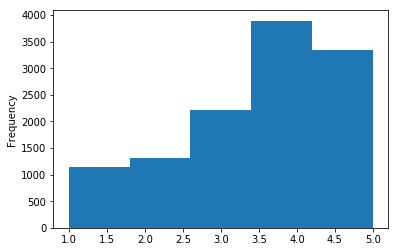

In [24]:
samplepdf['Stars (Review)'].plot.hist(bins=5)

In [25]:
def sentiment_calc(text):
    try:
        return int((TextBlob(text).sentiment.polarity+1)*5.0/2.0)
    except:
        return 0
    
def to_int(text):
    try:
        return (int(str(text)))
    except:
        return 0

samplepdf['sscore'] = samplepdf['Text'].apply(sentiment_calc)
samplepdf['nuseful']= samplepdf['Useful'].apply(to_int)
samplepdf['ncool']= samplepdf['Cool'].apply(to_int)
samplepdf['nfunny']= samplepdf['Funny'].apply(to_int)


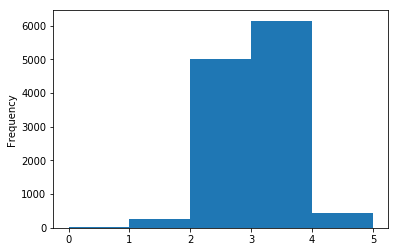

In [26]:
samplepdf["sscore"].plot.hist(bins=5)

In [27]:
samplepdf['ascore'] = samplepdf['Stars (Review)']+samplepdf['sscore']

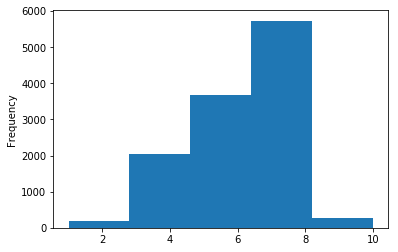

In [28]:
samplepdf["ascore"].plot.hist(bins=5)

In [29]:
samplepdf["mscore"] = (samplepdf['Stars (Review)']+samplepdf["sscore"])/2

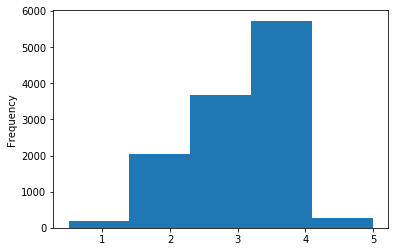

In [30]:
samplepdf["mscore"].plot.hist(bins=5)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=1, svd_solver='arpack')
scaler = MinMaxScaler()

samplepdf["fscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["sscore",'Stars (Review)']])))*5

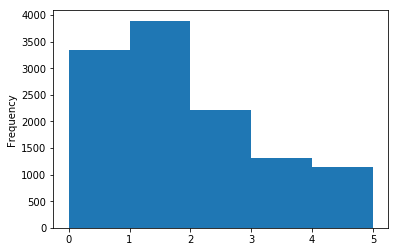

In [32]:
samplepdf["fscore"].plot.hist(bins=5)

In [33]:
samplepdf["ffscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["sscore",'Stars (Review)','nuseful','nfunny','ncool']])))*5

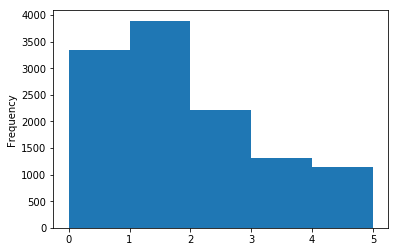

In [34]:
samplepdf["ffscore"].plot.hist(bins=5)

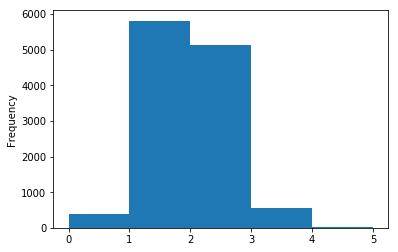

In [35]:
samplepdf["sfscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["sscore",'nuseful','nfunny','ncool']])))*5
samplepdf["sfscore"].plot.hist(bins=5)

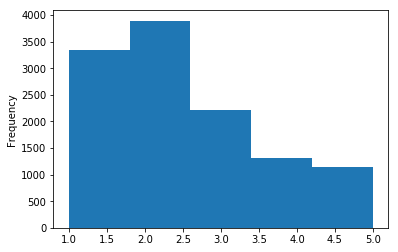

In [36]:
samplepdf["gfscore"] = scaler.fit_transform(pca.fit_transform(scaler.fit_transform(samplepdf.loc[:,["Stars (Review)","sscore",'nuseful','nfunny','ncool']])))*4+1
samplepdf["gfscore"].plot.hist(bins=5)

In [37]:
from sklearn.model_selection import train_test_split
ratings_base, ratings_test = train_test_split(samplepdf, test_size=0.25, random_state=42)

In [38]:
Number_Biz = len(np.unique(samplepdf["nbiz_id"])) 
Number_Users = len(np.unique(samplepdf["nuser_id"]))

print(Number_Biz)
print(Number_Users)

3828
8493


In [39]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","Stars (Review)"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","Stars (Review)"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [40]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [41]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [42]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [44]:
print('User-based CF RMSE: ' + str(rmse(test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.03647045834029715
Item-based CF RMSE: 0.024583514093513784


In [45]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix[test_data_matrix.nonzero()].flatten(),item_prediction[test_data_matrix.nonzero()].flatten())))
print('user r2 -'+str(r2_score(test_data_matrix[test_data_matrix.nonzero()].flatten(),user_prediction[test_data_matrix.nonzero()].flatten())))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix[test_data_matrix.nonzero()].flatten(),item_prediction[test_data_matrix.nonzero()].flatten())))
print('user mse -'+str(mean_squared_error(test_data_matrix[test_data_matrix.nonzero()].flatten(),user_prediction[test_data_matrix.nonzero()].flatten())))


from sklearn.metrics import accuracy_score
print('item accuracy -'+str(accuracy_score(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),item_prediction[test_data_matrix.nonzero()].flatten().astype(int))))
print('user accuracy -'+str(accuracy_score(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),user_prediction[test_data_matrix.nonzero()].flatten().astype(int))))

from sklearn.metrics import classification_report
print('item cr -'+str(classification_report(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),item_prediction[test_data_matrix.nonzero()].flatten().astype(int))))
print('user cr -'+str(classification_report(test_data_matrix[test_data_matrix.nonzero()].flatten().astype(int),user_prediction[test_data_matrix.nonzero()].flatten().astype(int))))



item r2 --8.065913468960677
user r2 --8.060307089651692
item mse -14.49304663443388
user mse -14.484084104948721
item accuracy -0.0
user accuracy -0.0


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


item cr -             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       287
          2       0.00      0.00      0.00       325
          3       0.00      0.00      0.00       538
          4       0.00      0.00      0.00       993
          5       0.00      0.00      0.00       834

avg / total       0.00      0.00      0.00      2977

user cr -             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       287
          2       0.00      0.00      0.00       325
          3       0.00      0.00      0.00       538
          4       0.00      0.00      0.00       993
          5       0.00      0.00      0.00       834

avg / total       0.00      0.00      0.00      2977



In [46]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","sscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","sscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse(test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))


User-based CF RMSE: 0.02547135483058431
Item-based CF RMSE: 0.017235407867174417


In [47]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

item r2 --0.00045529124307369564
user r2 --0.0007525281087457172
item mse -0.0006483255630115106
user mse -0.000648789916905525


In [48]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","ascore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","ascore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse( test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))


User-based CF RMSE: 0.06129591284803752
Item-based CF RMSE: 0.04137046764524803


In [49]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

item r2 --0.000599839209174776
user r2 --0.0008585808027178944
item mse -0.003754454313866018
user mse -0.003757188931874213


In [50]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","mscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","mscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse(test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))


User-based CF RMSE: 0.03064795642401876
Item-based CF RMSE: 0.020685233822624015


In [51]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","fscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","fscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse(test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))


User-based CF RMSE: 0.022191334907245088
Item-based CF RMSE: 0.015140623632679305


In [52]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

item r2 --0.004791600514614989
user r2 --0.006307566635876213
item mse -0.0004921757715345873
user mse -0.000492455344965512


In [53]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","ffscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","ffscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse( test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.02216650818592002
Item-based CF RMSE: 0.015115727761065737


In [54]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

from sklearn.metrics import accuracy_score
print('item accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))

from sklearn.metrics import classification_report
print('item cr -'+str(classification_report(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user cr -'+str(classification_report(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))


item r2 --0.004769906886823748
user r2 --0.0062838643571447705
item mse -0.0004910751176585865
user mse -0.0004913540851564594
item accuracy -0.9999340842621516
user accuracy -0.9999340842621516


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


item cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  32509061
          1       0.00      0.00      0.00       993
          2       0.00      0.00      0.00       538
          3       0.00      0.00      0.00       325
          4       0.00      0.00      0.00       286
          5       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00  32511204

user cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  32509061
          1       0.00      0.00      0.00       993
          2       0.00      0.00      0.00       538
          3       0.00      0.00      0.00       325
          4       0.00      0.00      0.00       286
          5       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00  32511204



In [55]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","sfscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","sfscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse( test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.023825835318846956
Item-based CF RMSE: 0.016825451990557114


In [56]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

from sklearn.metrics import accuracy_score
print('item accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))

from sklearn.metrics import classification_report
print('item cr -'+str(classification_report(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user cr -'+str(classification_report(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))


item r2 --0.00044517729617913335
user r2 --0.0007683750846424615
item mse -0.0005672880437305808
user mse -0.0005676704286408147
item accuracy -0.9999116612230049
user accuracy -0.9999116612230049


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


item cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  32508332
          1       0.00      0.00      0.00      1490
          2       0.00      0.00      0.00      1235
          3       0.00      0.00      0.00       141
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00  32511204

user cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  32508332
          1       0.00      0.00      0.00      1490
          2       0.00      0.00      0.00      1235
          3       0.00      0.00      0.00       141
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00  32511204



In [57]:
train_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_base.loc[:,["nuser_id","nbiz_id","gfscore"]].itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((Number_Users, Number_Biz))
for line in ratings_test.loc[:,["nuser_id","nbiz_id","gfscore"]].itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print('User-based CF RMSE: ' + str(rmse( test_data_matrix,user_prediction)))
print('Item-based CF RMSE: ' + str(rmse(test_data_matrix,item_prediction)))

User-based CF RMSE: 0.02611409146537946
Item-based CF RMSE: 0.01809905535317715


In [58]:
from sklearn.metrics import r2_score
print('item r2 -'+str(r2_score(test_data_matrix,item_prediction)))
print('user r2 -'+str(r2_score(test_data_matrix,user_prediction)))

from sklearn.metrics import mean_squared_error

print('item mse -'+str(mean_squared_error(test_data_matrix,item_prediction)))
print('user mse -'+str(mean_squared_error(test_data_matrix,user_prediction)))

from sklearn.metrics import accuracy_score
print('item accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user accuracy -'+str(accuracy_score(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))

from sklearn.metrics import classification_report
print('item cr -'+str(classification_report(test_data_matrix.flatten().astype(int),item_prediction.flatten().astype(int))))
print('user cr -'+str(classification_report(test_data_matrix.flatten().astype(int),user_prediction.flatten().astype(int))))


item r2 --0.0006823322412605534
user r2 --0.0011031473801903302
item mse -0.0006815168797852132
user mse -0.000681945773062206
item accuracy -0.9999084315671607
user accuracy -0.9999084315671607


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


item cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  32508227
          1       0.00      0.00      0.00       874
          2       0.00      0.00      0.00      1193
          3       0.00      0.00      0.00       613
          4       0.00      0.00      0.00       296
          5       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00  32511204

user cr -             precision    recall  f1-score   support

          0       1.00      1.00      1.00  32508227
          1       0.00      0.00      0.00       874
          2       0.00      0.00      0.00      1193
          3       0.00      0.00      0.00       613
          4       0.00      0.00      0.00       296
          5       0.00      0.00      0.00         1

avg / total       1.00      1.00      1.00  32511204



In [59]:
samplepdf.head(5)

,Number of Records,Address,Business Id (Review),Business Id,Category,City,Cool,Date,Funny,Id (Category),...,sscore,nuseful,ncool,nfunny,ascore,mscore,fscore,ffscore,sfscore,gfscore
0,1,"421 Dundas St W, 3rd Fl",Rh2smrKvcamnP8VBUgMI0Q,Rh2smrKvcamnP8VBUgMI0Q,Restaurants,Toronto,0,11/20/2017 12:00:00 AM,0,938,...,2,0,0,0,4,2.0,3.612336,3.607516,2.984393,3.886012
1,1,688 Queen Street E,SGIngUI_qmRBDM0_3b55jg,SGIngUI_qmRBDM0_3b55jg,Restaurants,Toronto,2,6/7/2009 12:00:00 AM,2,7365,...,2,2,2,2,6,3.0,1.571217,1.570408,2.995063,2.256326
2,1,691 Bloor Street W,nHFJtud7jWZhM9dHQ1eIRA,nHFJtud7jWZhM9dHQ1eIRA,Restaurants,Toronto,2,10/30/2011 12:00:00 AM,0,10511,...,4,1,2,0,8,4.0,1.204112,1.202111,0.998965,1.961689
3,1,1526 Queen Street W,Ae4ABFarGMaI5lk1i98A0w,Ae4ABFarGMaI5lk1i98A0w,Restaurants,Toronto,0,7/24/2016 12:00:00 AM,0,11294,...,5,0,0,0,9,4.5,1.020559,1.019588,0.000000,1.815670
4,1,598 Bay Street,RwRNR4z3kY-4OsFqigY5sw,RwRNR4z3kY-4OsFqigY5sw,Restaurants,Toronto,0,5/29/2015 12:00:00 AM,1,19725,...,2,0,0,1,5,2.5,2.591776,2.589170,2.986833,3.071336
